In [1]:
import fastsolver as fs

In [2]:
# 创建一个大小为 3 的向量
v = fs.Vector(3)
v[0] = 1.0
v[1] = 2.0
v[2] = 3.0

# 输出向量和矩阵
print("Vector v:", [v[i] for i in range(v.size())])

Vector v: [1.0, 2.0, 3.0]


In [3]:
# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

sol = fs.Vector(2)

# 使用共轭梯度法求解
cg = fs.ConjugateGrad(A, b, 100, 1e-6)
cg.solve(sol)

# 输出解
print("Solution x:", [sol[i] for i in range(sol.size())])

Solution x: [0.09090909090909091, 0.6363636363636364]
Iteration 0:
  Residual norm: 0.559017
  Alpha: 0.25
  Solution: [0.25, 0.5]
Iteration 1:
  Residual norm: 0
  Alpha: 0.363636
  Solution: [0.0909091, 0.636364]


In [4]:
import math
# 定义被积函数
def f(x):
    return x ** 2

gauss = fs.GaussQuadrature(5)  # 使用 5 个积分点
a = 0.0
b = 1.0
integral = gauss.integrate(f, a, b)
print("Integral of x^2 from 0 to 1:", integral)

Integral of x^2 from 0 to 1: 0.33333333333333326


In [5]:
import fastsolver as fs

# 定义 ODE 的右侧函数
def f(y):
    result = fs.Vector(2)  # 创建一个大小为 2 的 Vector 对象
    result[0] = -y[1]      # 设置第一个分量
    result[1] = y[0]       # 设置第二个分量
    return result

# 初始条件
y0 = fs.Vector(2)
y0[0] = 1.0
y0[1] = 0.0

# 创建 Runge-Kutta 求解器
rk = fs.RK4()

# 求解 ODE
h = 0.1  # 步长
n = 100  # 步数
rk.solve(y0, f, h, n)

# 输出结果
print("Final state vector:", [y0[i] for i in range(y0.size())])

Final state vector: [-0.8390754644130645, -0.544013766248773]


In [6]:
import fastsolver as fs

# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

# 初始猜测
x = fs.Vector(2)
x[0] = 0.0
x[1] = 0.0

# 创建多重网格求解器
amg = fs.AlgebraicMultiGrid()

# 执行 V-cycle
levels = 2
smoothing_steps = 10
theta = 0.5
amg.amgVCycle(A, b, x, levels, smoothing_steps, theta)

# 输出结果
print("Solution x:", [x[i] for i in range(x.size())])

Solution x: [0.09090909127908553, 0.6363636362403048]


In [39]:
import fastsolver as fs

# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

# 初始猜测
x = fs.Vector(2)
x[0] = 0.0
x[1] = 0.0

# 创建 GMRES 求解器
gmres = fs.GMRES()
gmres.enablePreconditioner()

# 求解线性方程组
max_iter = 1000
krylov_dim = 1
tol = 1e-20
gmres.solve(A, b, x, max_iter, krylov_dim, tol)

# 输出结果
print("Solution x:", [x[i] for i in range(x.size())])

Initial residual norm: Solution x: [0.09090909090909083, 0.6363636363636355]
0.642824
Residual norm after restart: 0.642824 
Residual norm after restart: 0.321412 
Residual norm after restart: 0.169897 
Residual norm after restart: 0.0963295 
Residual norm after restart: 0.0577977 
Residual norm after restart: 0.0362578 
Residual norm after restart: 0.0235702 
Residual norm after restart: 0.0157751 
Residual norm after restart: 0.0108174 
Residual norm after restart: 0.00757221 
Residual norm after restart: 0.00539536 
Residual norm after restart: 0.00390416 
Residual norm after restart: 0.00286382 
Residual norm after restart: 0.00212627 
Residual norm after restart: 0.00159589 
Residual norm after restart: 0.00120958 
Residual norm after restart: 0.000924976 
Residual norm after restart: 0.0007131 
Residual norm after restart: 0.000553867 
Residual norm after restart: 0.000433155 
Residual norm after restart: 0.00034091 
Residual norm after restart: 0.000269899 
Residual norm after r

al norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16

In [8]:
import fastsolver as fs

# 创建一个稠密矩阵
A = fs.DenseMatrix(2, 2)
A[0, 0] = 4.0
A[0, 1] = 1.0
A[1, 0] = 1.0
A[1, 1] = 3.0

# 创建置换矩阵
P = [0, 0]

# 执行 LU 分解
fs.pivot_lu(A, P)

# 输出 LU 分解结果
print("LU decomposition of A:")
for i in range(A.rows()):
    print([A[i, j] for j in range(A.cols())])

print("Permutation matrix P:")
print(P)

LU decomposition of A:
[4.0, 1.0]
[0.25, 2.75]
Permutation matrix P:
[0, 0]


In [9]:
import fastsolver as fs
import numpy as np

# Load a matrix from SuiteSparse
# A = mmread('../data/bcsstk01/bcsstk01.mtx')

matrix = fs.SparseMatrix(1, 1)
fs.read_matrix_market("../data/bcsstk01/bcsstk01.mtx", matrix)

# # Generate a random exact solution

x_exact = np.random.rand(matrix.cols())
x_ext = fs.Vector(x_exact)

# # Generate a random right-hand side
b = matrix * x_ext




M: 48 N: 48 L: 224
Matrix created 48 48


In [20]:
x = fs.Vector(matrix.cols())
# # Solve the system using GMRES
gmres = fs.GMRES()
gmres.enablePreconditioner()

# 求解线性方程组
max_iter = 200
krylov_dim = 48
tol = 1e-15
gmres.solve(matrix, b, x, max_iter, krylov_dim, tol)


Initial residual norm: 3.94359
KrylovUpdate : 1
Residual norm after restart: 3.94359 
KrylovUpdate : 1
Residual norm after restart: 1.97179 
KrylovUpdate : 1
Residual norm after restart: 1.04228 
Residual norm after restart: 2.3134e-15 
KrylovUpdate : 1
Residual norm after restart: 6.64957e-16 
Converged after restart at iteration 4


In [42]:
res = '''Residual norm after restart: 2.23607 
Residual norm after restart: 1.18291 
Residual norm after restart: 0.693847 
Residual norm after restart: 0.452427 
Residual norm after restart: 0.31443 
Residual norm after restart: 0.226378 
Residual norm after restart: 0.166498 
Residual norm after restart: 0.124291 
Residual norm after restart: 0.0938681 
Residual norm after restart: 0.0715908 
Residual norm after restart: 0.0550732 
Residual norm after restart: 0.0426965 
Residual norm after restart: 0.0333363 
Residual norm after restart: 0.026198 
Residual norm after restart: 0.0207127 
Residual norm after restart: 0.0164679 
Residual norm after restart: 0.0131616 
Residual norm after restart: 0.0105708 
Residual norm after restart: 0.00852909 
Residual norm after restart: 0.0069116 
Residual norm after restart: 0.00562377 
Residual norm after restart: 0.00459361 
Residual norm after restart: 0.00376591 
Residual norm after restart: 0.0030981 
Residual norm after restart: 0.00255713 
Residual norm after restart: 0.00211728 
Residual norm after restart: 0.00175835 
Residual norm after restart: 0.00146446 
Residual norm after restart: 0.00122303 
Residual norm after restart: 0.00102409 
Residual norm after restart: 0.000859669 
Residual norm after restart: 0.00072339 
Residual norm after restart: 0.000610128 
Residual norm after restart: 0.000515748 
Residual norm after restart: 0.000436905 
Residual norm after restart: 0.000370882 
Residual norm after restart: 0.000315464 
Residual norm after restart: 0.000268845 
Residual norm after restart: 0.000229541 
Residual norm after restart: 0.000196336 
Residual norm after restart: 0.000168227 
Residual norm after restart: 0.000144386 
Residual norm after restart: 0.000124125 
Residual norm after restart: 0.000106877 
Residual norm after restart: 9.21663e-05 
Residual norm after restart: 7.95991e-05 
Residual norm after restart: 6.88449e-05 
Residual norm after restart: 5.96274e-05 
Residual norm after restart: 5.17146e-05 
Residual norm after restart: 4.49115e-05 
Residual norm after restart: 3.90537e-05 
Residual norm after restart: 3.40028e-05 
Residual norm after restart: 2.96414e-05 
Residual norm after restart: 2.58704e-05 
Residual norm after restart: 2.26054e-05 
Residual norm after restart: 1.97749e-05 
Residual norm after restart: 1.7318e-05 
Residual norm after restart: 1.51828e-05 
Residual norm after restart: 1.33249e-05 
Residual norm after restart: 1.17064e-05 
Residual norm after restart: 1.02949e-05 
Residual norm after restart: 9.06246e-06 
Residual norm after restart: 7.98528e-06 
Residual norm after restart: 7.04277e-06 
Residual norm after restart: 6.21723e-06 
Residual norm after restart: 5.49342e-06 
Residual norm after restart: 4.85816e-06 
Residual norm after restart: 4.30008e-06 
Residual norm after restart: 3.80934e-06 
Residual norm after restart: 3.37741e-06 
Residual norm after restart: 2.99689e-06 
Residual norm after restart: 2.66136e-06 
Residual norm after restart: 2.36525e-06 
Residual norm after restart: 2.1037e-06 
Residual norm after restart: 1.87248e-06 
Residual norm after restart: 1.6679e-06 
Residual norm after restart: 1.48676e-06 
Residual norm after restart: 1.32623e-06 
Residual norm after restart: 1.18386e-06 
Residual norm after restart: 1.0575e-06 
Residual norm after restart: 9.45267e-07 
Residual norm after restart: 8.45504e-07 
Residual norm after restart: 7.56762e-07 
Residual norm after restart: 6.77769e-07 
Residual norm after restart: 6.07403e-07 
Residual norm after restart: 5.4468e-07 
Residual norm after restart: 4.88731e-07 
Residual norm after restart: 4.38792e-07 
Residual norm after restart: 3.94188e-07 
Residual norm after restart: 3.54324e-07 
Residual norm after restart: 3.18673e-07 
Residual norm after restart: 2.8677e-07 
Residual norm after restart: 2.58203e-07 
Residual norm after restart: 2.32609e-07 
Residual norm after restart: 2.09665e-07 
Residual norm after restart: 1.89083e-07 
Residual norm after restart: 1.70611e-07 
Residual norm after restart: 1.54022e-07 
Residual norm after restart: 1.39117e-07 
Residual norm after restart: 1.25716e-07 
Residual norm after restart: 1.13662e-07 
Residual norm after restart: 1.02814e-07 
Residual norm after restart: 9.30455e-08 
Residual norm after restart: 8.42447e-08 
Residual norm after restart: 7.63117e-08 
Residual norm after restart: 6.91574e-08 
Residual norm after restart: 6.27021e-08 
Residual norm after restart: 5.68747e-08 
Residual norm after restart: 5.16116e-08 
Residual norm after restart: 4.68558e-08 
Residual norm after restart: 4.25565e-08 
Residual norm after restart: 3.8668e-08 
Residual norm after restart: 3.51494e-08 
Residual norm after restart: 3.19642e-08 
Residual norm after restart: 2.90794e-08 
Residual norm after restart: 2.64657e-08 
Residual norm after restart: 2.40964e-08 
Residual norm after restart: 2.19478e-08 
Residual norm after restart: 1.99985e-08 
Residual norm after restart: 1.82293e-08 
Residual norm after restart: 1.66229e-08 
Residual norm after restart: 1.51637e-08 
Residual norm after restart: 1.38377e-08 
Residual norm after restart: 1.26322e-08 
Residual norm after restart: 1.1536e-08 
Residual norm after restart: 1.05386e-08 
Residual norm after restart: 9.63078e-09 
Residual norm after restart: 8.80426e-09 
Residual norm after restart: 8.05144e-09 
Residual norm after restart: 7.36549e-09 
Residual norm after restart: 6.74025e-09 
Residual norm after restart: 6.17013e-09 
Residual norm after restart: 5.6501e-09 
Residual norm after restart: 5.17557e-09 
Residual norm after restart: 4.74243e-09 
Residual norm after restart: 4.34691e-09 
Residual norm after restart: 3.98564e-09 
Residual norm after restart: 3.65553e-09 
Residual norm after restart: 3.35379e-09 
Residual norm after restart: 3.0779e-09 
Residual norm after restart: 2.82556e-09 
Residual norm after restart: 2.59468e-09 
Residual norm after restart: 2.38337e-09 
Residual norm after restart: 2.1899e-09 
Residual norm after restart: 2.01273e-09 
Residual norm after restart: 1.85042e-09 
Residual norm after restart: 1.70168e-09 
Residual norm after restart: 1.56534e-09 
Residual norm after restart: 1.44032e-09 
Residual norm after restart: 1.32565e-09 
Residual norm after restart: 1.22045e-09 
Residual norm after restart: 1.12389e-09 
Residual norm after restart: 1.03525e-09 
Residual norm after restart: 9.5386e-10 
Residual norm after restart: 8.79096e-10 
Residual norm after restart: 8.10402e-10 
Residual norm after restart: 7.47269e-10 
Residual norm after restart: 6.8923e-10 
Residual norm after restart: 6.35859e-10 
Residual norm after restart: 5.86768e-10 
Residual norm after restart: 5.41602e-10 
Residual norm after restart: 5.00035e-10 
Residual norm after restart: 4.61771e-10 
Residual norm after restart: 4.26538e-10 
Residual norm after restart: 3.94088e-10 
Residual norm after restart: 3.64192e-10 
Residual norm after restart: 3.36644e-10 
Residual norm after restart: 3.11252e-10 
Residual norm after restart: 2.87842e-10 
Residual norm after restart: 2.66253e-10 
Residual norm after restart: 2.4634e-10 
Residual norm after restart: 2.27967e-10 
Residual norm after restart: 2.11012e-10 
Residual norm after restart: 1.9536e-10 
Residual norm after restart: 1.8091e-10 
Residual norm after restart: 1.67565e-10 
Residual norm after restart: 1.55238e-10 
Residual norm after restart: 1.43848e-10 
Residual norm after restart: 1.33323e-10 
Residual norm after restart: 1.23593e-10 
Residual norm after restart: 1.14598e-10 
Residual norm after restart: 1.06279e-10 
Residual norm after restart: 9.85842e-11 
Residual norm after restart: 9.14653e-11 
Residual norm after restart: 8.48777e-11 
Residual norm after restart: 7.87805e-11 
Residual norm after restart: 7.31353e-11 
Residual norm after restart: 6.79084e-11 
Residual norm after restart: 6.30674e-11 
Residual norm after restart: 5.85827e-11 
Residual norm after restart: 5.44275e-11 
Residual norm after restart: 5.05765e-11 
Residual norm after restart: 4.70072e-11 
Residual norm after restart: 4.36979e-11 
Residual norm after restart: 4.06292e-11 
Residual norm after restart: 3.77829e-11 
Residual norm after restart: 3.51429e-11 
Residual norm after restart: 3.2693e-11 
Residual norm after restart: 3.04195e-11 
Residual norm after restart: 2.8309e-11 
Residual norm after restart: 2.63499e-11 
Residual norm after restart: 2.45306e-11 
Residual norm after restart: 2.28409e-11 
Residual norm after restart: 2.12714e-11 
Residual norm after restart: 1.9813e-11 
Residual norm after restart: 1.84578e-11 
Residual norm after restart: 1.71986e-11 
Residual norm after restart: 1.60276e-11 
Residual norm after restart: 1.49391e-11 
Residual norm after restart: 1.39269e-11 
Residual norm after restart: 1.29851e-11 
Residual norm after restart: 1.21092e-11 
Residual norm after restart: 1.12944e-11 
Residual norm after restart: 1.05358e-11 
Residual norm after restart: 9.82984e-12 
Residual norm after restart: 9.1726e-12 
Residual norm after restart: 8.56082e-12 
Residual norm after restart: 7.99083e-12 
Residual norm after restart: 7.46028e-12 
Residual norm after restart: 6.96596e-12 
Residual norm after restart: 6.5056e-12 
Residual norm after restart: 6.07628e-12 
Residual norm after restart: 5.67618e-12 
Residual norm after restart: 5.30338e-12 
Residual norm after restart: 4.95571e-12 
Residual norm after restart: 4.63177e-12 
Residual norm after restart: 4.32946e-12 
Residual norm after restart: 4.04742e-12 
Residual norm after restart: 3.78437e-12 
Residual norm after restart: 3.539e-12 
Residual norm after restart: 3.30989e-12 
Residual norm after restart: 3.09612e-12 
Residual norm after restart: 2.89653e-12 
Residual norm after restart: 2.71057e-12 
Residual norm after restart: 2.5363e-12 
Residual norm after restart: 2.37368e-12 
Residual norm after restart: 2.22203e-12 
Residual norm after restart: 2.08024e-12 
Residual norm after restart: 1.94775e-12 
Residual norm after restart: 1.82402e-12 
Residual norm after restart: 1.70836e-12 
Residual norm after restart: 1.60028e-12 
Residual norm after restart: 1.49916e-12 
Residual norm after restart: 1.40464e-12 
Residual norm after restart: 1.3164e-12 
Residual norm after restart: 1.23357e-12 
Residual norm after restart: 1.15618e-12 
Residual norm after restart: 1.08402e-12 
Residual norm after restart: 1.01604e-12 
Residual norm after restart: 9.52893e-13 
Residual norm after restart: 8.93674e-13 
Residual norm after restart: 8.3815e-13 
Residual norm after restart: 7.86393e-13 
Residual norm after restart: 7.37836e-13 
Residual norm after restart: 6.92363e-13 
Residual norm after restart: 6.49857e-13 
Residual norm after restart: 6.09985e-13 
Residual norm after restart: 5.72774e-13 
Residual norm after restart: 5.37397e-13 
Residual norm after restart: 5.04609e-13 
Residual norm after restart: 4.73799e-13 
Residual norm after restart: 4.44895e-13 
Residual norm after restart: 4.1778e-13 
Residual norm after restart: 3.92527e-13 
Residual norm after restart: 3.6899e-13 
Residual norm after restart: 3.46559e-13 
Residual norm after restart: 3.25729e-13 
Residual norm after restart: 3.06076e-13 
Residual norm after restart: 2.88023e-13 
Residual norm after restart: 2.70582e-13 
Residual norm after restart: 2.54435e-13 
Residual norm after restart: 2.39089e-13 
Residual norm after restart: 2.24731e-13 
Residual norm after restart: 2.11363e-13 
Residual norm after restart: 1.98794e-13 
Residual norm after restart: 1.87332e-13 
Residual norm after restart: 1.76174e-13 
Residual norm after restart: 1.65323e-13 
Residual norm after restart: 1.55838e-13 
Residual norm after restart: 1.46587e-13 
Residual norm after restart: 1.37903e-13 
Residual norm after restart: 1.29829e-13 
Residual norm after restart: 1.2225e-13 
Residual norm after restart: 1.15049e-13 
Residual norm after restart: 1.08199e-13 
Residual norm after restart: 1.01914e-13 
Residual norm after restart: 9.60078e-14 
Residual norm after restart: 9.05237e-14 
Residual norm after restart: 8.53452e-14 
Residual norm after restart: 8.03556e-14 
Residual norm after restart: 7.56716e-14 
Residual norm after restart: 7.12933e-14 
Residual norm after restart: 6.71038e-14 
Residual norm after restart: 6.34088e-14 
Residual norm after restart: 5.95249e-14 
Residual norm after restart: 5.63245e-14 
Residual norm after restart: 5.32407e-14 
Residual norm after restart: 5.00404e-14 
Residual norm after restart: 4.72621e-14 
Residual norm after restart: 4.44844e-14 
Residual norm after restart: 4.1967e-14 
Residual norm after restart: 3.94946e-14 
Residual norm after restart: 3.7283e-14 
Residual norm after restart: 3.53051e-14 
Residual norm after restart: 3.3283e-14 
Residual norm after restart: 3.13044e-14 
Residual norm after restart: 2.95152e-14 
Residual norm after restart: 2.81042e-14 
Residual norm after restart: 2.63149e-14 
Residual norm after restart: 2.48313e-14 
Residual norm after restart: 2.35367e-14 
Residual norm after restart: 2.23152e-14 
Residual norm after restart: 2.10205e-14 
Residual norm after restart: 1.98416e-14 
Residual norm after restart: 1.8547e-14 
Residual norm after restart: 1.77469e-14 
Residual norm after restart: 1.68315e-14 
Residual norm after restart: 1.58416e-14 
Residual norm after restart: 1.48521e-14 
Residual norm after restart: 1.40521e-14 
Residual norm after restart: 1.31813e-14 
Residual norm after restart: 1.23809e-14 
Residual norm after restart: 1.19575e-14 
Residual norm after restart: 1.09682e-14 
Residual norm after restart: 1.06628e-14 
Residual norm after restart: 9.97966e-15 
Residual norm after restart: 9.36807e-15 
Residual norm after restart: 8.80653e-15 
Residual norm after restart: 8.19161e-15 
Residual norm after restart: 7.88493e-15 
Residual norm after restart: 7.39112e-15 
Residual norm after restart: 7.27344e-15 
Residual norm after restart: 6.96881e-15 
Residual norm after restart: 6.47366e-15 
Residual norm after restart: 6.16948e-15 
Residual norm after restart: 5.86635e-15 
Residual norm after restart: 5.56442e-15 
Residual norm after restart: 5.17893e-15 
Residual norm after restart: 4.98983e-15 
Residual norm after restart: 4.68404e-15 
Residual norm after restart: 4.3794e-15 
Residual norm after restart: 4.18953e-15 
Residual norm after restart: 3.8202e-15 
Residual norm after restart: 3.51083e-15 
Residual norm after restart: 3.33067e-15 
Residual norm after restart: 2.84356e-15 
Residual norm after restart: 3.02013e-15 
Residual norm after restart: 2.89511e-15 
Residual norm after restart: 2.78221e-15 
Residual norm after restart: 2.78221e-15 
Residual norm after restart: 2.78221e-15 
Residual norm after restart: 2.68298e-15 
Residual norm after restart: 2.59897e-15 
Residual norm after restart: 2.59897e-15 
Residual norm after restart: 2.80867e-15 
Residual norm after restart: 2.39149e-15 
Residual norm after restart: 2.39149e-15 
Residual norm after restart: 2.39149e-15 
Residual norm after restart: 2.39149e-15 
Residual norm after restart: 2.31821e-15 
Residual norm after restart: 2.31821e-15 
Residual norm after restart: 2.31821e-15 
Residual norm after restart: 2.26442e-15 
Residual norm after restart: 2.26442e-15 
Residual norm after restart: 2.26442e-15 
Residual norm after restart: 2.26442e-15 
Residual norm after restart: 2.26442e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 
Residual norm after restart: 2.23152e-15 '''

In [43]:
pre_res = '''Residual norm after restart: 0.642824 
Residual norm after restart: 0.321412 
Residual norm after restart: 0.169897 
Residual norm after restart: 0.0963295 
Residual norm after restart: 0.0577977 
Residual norm after restart: 0.0362578 
Residual norm after restart: 0.0235702 
Residual norm after restart: 0.0157751 
Residual norm after restart: 0.0108174 
Residual norm after restart: 0.00757221 
Residual norm after restart: 0.00539536 
Residual norm after restart: 0.00390416 
Residual norm after restart: 0.00286382 
Residual norm after restart: 0.00212627 
Residual norm after restart: 0.00159589 
Residual norm after restart: 0.00120958 
Residual norm after restart: 0.000924976 
Residual norm after restart: 0.0007131 
Residual norm after restart: 0.000553867 
Residual norm after restart: 0.000433155 
Residual norm after restart: 0.00034091 
Residual norm after restart: 0.000269899 
Residual norm after restart: 0.000214858 
Residual norm after restart: 0.000171924 
Residual norm after restart: 0.000138234 
Residual norm after restart: 0.00011165 
Residual norm after restart: 9.0565e-05 
Residual norm after restart: 7.37582e-05 
Residual norm after restart: 6.02999e-05 
Residual norm after restart: 4.94757e-05 
Residual norm after restart: 4.07341e-05 
Residual norm after restart: 3.36467e-05 
Residual norm after restart: 2.7879e-05 
Residual norm after restart: 2.31686e-05 
Residual norm after restart: 1.93087e-05 
Residual norm after restart: 1.61356e-05 
Residual norm after restart: 1.3519e-05 
Residual norm after restart: 1.1355e-05 
Residual norm after restart: 9.56022e-06 
Residual norm after restart: 8.06763e-06 
Residual norm after restart: 6.82314e-06 
Residual norm after restart: 5.78291e-06 
Residual norm after restart: 4.91134e-06 
Residual norm after restart: 4.17939e-06 
Residual norm after restart: 3.56333e-06 
Residual norm after restart: 3.04368e-06 
Residual norm after restart: 2.60447e-06 
Residual norm after restart: 2.23248e-06 
Residual norm after restart: 1.91683e-06 
Residual norm after restart: 1.64847e-06 
Residual norm after restart: 1.41991e-06 
Residual norm after restart: 1.22491e-06 
Residual norm after restart: 1.05825e-06 
Residual norm after restart: 9.15579e-07 
Residual norm after restart: 7.9325e-07 
Residual norm after restart: 6.88198e-07 
Residual norm after restart: 5.97847e-07 
Residual norm after restart: 5.20026e-07 
Residual norm after restart: 4.529e-07 
Residual norm after restart: 3.94921e-07 
Residual norm after restart: 3.44772e-07 
Residual norm after restart: 3.01341e-07 
Residual norm after restart: 2.63678e-07 
Residual norm after restart: 2.30977e-07 
Residual norm after restart: 2.02549e-07 
Residual norm after restart: 1.77806e-07 
Residual norm after restart: 1.56247e-07 
Residual norm after restart: 1.37439e-07 
Residual norm after restart: 1.21013e-07 
Residual norm after restart: 1.06653e-07 
Residual norm after restart: 9.40852e-08 
Residual norm after restart: 8.30745e-08 
Residual norm after restart: 7.34182e-08 
Residual norm after restart: 6.49413e-08 
Residual norm after restart: 5.74927e-08 
Residual norm after restart: 5.09414e-08 
Residual norm after restart: 4.51739e-08 
Residual norm after restart: 4.00918e-08 
Residual norm after restart: 3.56098e-08 
Residual norm after restart: 3.16535e-08 
Residual norm after restart: 2.81582e-08 
Residual norm after restart: 2.50677e-08 
Residual norm after restart: 2.23328e-08 
Residual norm after restart: 1.99106e-08 
Residual norm after restart: 1.77637e-08 
Residual norm after restart: 1.58594e-08 
Residual norm after restart: 1.41689e-08 
Residual norm after restart: 1.26671e-08 
Residual norm after restart: 1.13319e-08 
Residual norm after restart: 1.01441e-08 
Residual norm after restart: 9.08657e-09 
Residual norm after restart: 8.14439e-09 
Residual norm after restart: 7.30441e-09 
Residual norm after restart: 6.55504e-09 
Residual norm after restart: 5.88605e-09 
Residual norm after restart: 5.28845e-09 
Residual norm after restart: 4.75426e-09 
Residual norm after restart: 4.27646e-09 
Residual norm after restart: 3.84884e-09 
Residual norm after restart: 3.46589e-09 
Residual norm after restart: 3.12273e-09 
Residual norm after restart: 2.81505e-09 
Residual norm after restart: 2.53903e-09 
Residual norm after restart: 2.29125e-09 
Residual norm after restart: 2.06872e-09 
Residual norm after restart: 1.86874e-09 
Residual norm after restart: 1.68893e-09 
Residual norm after restart: 1.52716e-09 
Residual norm after restart: 1.38156e-09 
Residual norm after restart: 1.25043e-09 
Residual norm after restart: 1.13228e-09 
Residual norm after restart: 1.02577e-09 
Residual norm after restart: 9.29702e-10 
Residual norm after restart: 8.43011e-10 
Residual norm after restart: 7.64742e-10 
Residual norm after restart: 6.94044e-10 
Residual norm after restart: 6.30155e-10 
Residual norm after restart: 5.7239e-10 
Residual norm after restart: 5.20141e-10 
Residual norm after restart: 4.72857e-10 
Residual norm after restart: 4.30048e-10 
Residual norm after restart: 3.91273e-10 
Residual norm after restart: 3.56137e-10 
Residual norm after restart: 3.24284e-10 
Residual norm after restart: 2.95395e-10 
Residual norm after restart: 2.69184e-10 
Residual norm after restart: 2.45392e-10 
Residual norm after restart: 2.23787e-10 
Residual norm after restart: 2.0416e-10 
Residual norm after restart: 1.86323e-10 
Residual norm after restart: 1.70106e-10 
Residual norm after restart: 1.55357e-10 
Residual norm after restart: 1.41936e-10 
Residual norm after restart: 1.29721e-10 
Residual norm after restart: 1.18598e-10 
Residual norm after restart: 1.08465e-10 
Residual norm after restart: 9.92324e-11 
Residual norm after restart: 9.08159e-11 
Residual norm after restart: 8.31407e-11 
Residual norm after restart: 7.61391e-11 
Residual norm after restart: 6.97499e-11 
Residual norm after restart: 6.39172e-11 
Residual norm after restart: 5.85909e-11 
Residual norm after restart: 5.37254e-11 
Residual norm after restart: 4.92791e-11 
Residual norm after restart: 4.52146e-11 
Residual norm after restart: 4.14981e-11 
Residual norm after restart: 3.80985e-11 
Residual norm after restart: 3.49879e-11 
Residual norm after restart: 3.21406e-11 
Residual norm after restart: 2.95337e-11 
Residual norm after restart: 2.7146e-11 
Residual norm after restart: 2.49585e-11 
Residual norm after restart: 2.29538e-11 
Residual norm after restart: 2.11161e-11 
Residual norm after restart: 1.94309e-11 
Residual norm after restart: 1.78851e-11 
Residual norm after restart: 1.64668e-11 
Residual norm after restart: 1.5165e-11 
Residual norm after restart: 1.39697e-11 
Residual norm after restart: 1.28723e-11 
Residual norm after restart: 1.1864e-11 
Residual norm after restart: 1.09377e-11 
Residual norm after restart: 1.00863e-11 
Residual norm after restart: 9.30344e-12 
Residual norm after restart: 8.58355e-12 
Residual norm after restart: 7.92133e-12 
Residual norm after restart: 7.31206e-12 
Residual norm after restart: 6.75125e-12 
Residual norm after restart: 6.23506e-12 
Residual norm after restart: 5.75967e-12 
Residual norm after restart: 5.32168e-12 
Residual norm after restart: 4.91831e-12 
Residual norm after restart: 4.54648e-12 
Residual norm after restart: 4.20377e-12 
Residual norm after restart: 3.88791e-12 
Residual norm after restart: 3.59651e-12 
Residual norm after restart: 3.32766e-12 
Residual norm after restart: 3.07959e-12 
Residual norm after restart: 2.85072e-12 
Residual norm after restart: 2.63947e-12 
Residual norm after restart: 2.44427e-12 
Residual norm after restart: 2.26407e-12 
Residual norm after restart: 2.09764e-12 
Residual norm after restart: 1.94392e-12 
Residual norm after restart: 1.80168e-12 
Residual norm after restart: 1.67029e-12 
Residual norm after restart: 1.54882e-12 
Residual norm after restart: 1.43641e-12 
Residual norm after restart: 1.33243e-12 
Residual norm after restart: 1.2363e-12 
Residual norm after restart: 1.14738e-12 
Residual norm after restart: 1.06495e-12 
Residual norm after restart: 9.88653e-13 
Residual norm after restart: 9.18076e-13 
Residual norm after restart: 8.52703e-13 
Residual norm after restart: 7.92117e-13 
Residual norm after restart: 7.35945e-13 
Residual norm after restart: 6.83924e-13 
Residual norm after restart: 6.35596e-13 
Residual norm after restart: 5.90926e-13 
Residual norm after restart: 5.49467e-13 
Residual norm after restart: 5.10917e-13 
Residual norm after restart: 4.7531e-13 
Residual norm after restart: 4.42195e-13 
Residual norm after restart: 4.11507e-13 
Residual norm after restart: 3.8296e-13 
Residual norm after restart: 3.56559e-13 
Residual norm after restart: 3.31938e-13 
Residual norm after restart: 3.09023e-13 
Residual norm after restart: 2.87904e-13 
Residual norm after restart: 2.68135e-13 
Residual norm after restart: 2.49865e-13 
Residual norm after restart: 2.32802e-13 
Residual norm after restart: 2.17035e-13 
Residual norm after restart: 2.02256e-13 
Residual norm after restart: 1.88708e-13 
Residual norm after restart: 1.75856e-13 
Residual norm after restart: 1.64015e-13 
Residual norm after restart: 1.52947e-13 
Residual norm after restart: 1.42593e-13 
Residual norm after restart: 1.33101e-13 
Residual norm after restart: 1.24257e-13 
Residual norm after restart: 1.15978e-13 
Residual norm after restart: 1.08271e-13 
Residual norm after restart: 1.01057e-13 
Residual norm after restart: 9.43483e-14 
Residual norm after restart: 8.80679e-14 
Residual norm after restart: 8.22158e-14 
Residual norm after restart: 7.68632e-14 
Residual norm after restart: 7.1719e-14 
Residual norm after restart: 6.70858e-14 
Residual norm after restart: 6.27323e-14 
Residual norm after restart: 5.86644e-14 
Residual norm after restart: 5.48876e-14 
Residual norm after restart: 5.12421e-14 
Residual norm after restart: 4.78821e-14 
Residual norm after restart: 4.47419e-14 
Residual norm after restart: 4.18216e-14 
Residual norm after restart: 3.91809e-14 
Residual norm after restart: 3.66831e-14 
Residual norm after restart: 3.4405e-14 
Residual norm after restart: 3.21155e-14 
Residual norm after restart: 3.00402e-14 
Residual norm after restart: 2.8196e-14 
Residual norm after restart: 2.6329e-14 
Residual norm after restart: 2.46162e-14 
Residual norm after restart: 2.31232e-14 
Residual norm after restart: 2.16188e-14 
Residual norm after restart: 2.03456e-14 
Residual norm after restart: 1.91323e-14 
Residual norm after restart: 1.7842e-14 
Residual norm after restart: 1.67001e-14 
Residual norm after restart: 1.57009e-14 
Residual norm after restart: 1.47018e-14 
Residual norm after restart: 1.37683e-14 
Residual norm after restart: 1.29176e-14 
Residual norm after restart: 1.20555e-14 
Residual norm after restart: 1.13475e-14 
Residual norm after restart: 1.06281e-14 
Residual norm after restart: 9.9915e-15 
Residual norm after restart: 9.42055e-15 
Residual norm after restart: 8.84961e-15 
Residual norm after restart: 8.35581e-15 
Residual norm after restart: 7.78487e-15 
Residual norm after restart: 7.27952e-15 
Residual norm after restart: 6.85131e-15 
Residual norm after restart: 6.42311e-15 
Residual norm after restart: 6.07206e-15 
Residual norm after restart: 5.70943e-15 
Residual norm after restart: 5.35839e-15 
Residual norm after restart: 5.07292e-15 
Residual norm after restart: 4.78746e-15 
Residual norm after restart: 4.35344e-15 
Residual norm after restart: 4.13933e-15 
Residual norm after restart: 3.93107e-15 
Residual norm after restart: 3.71697e-15 
Residual norm after restart: 3.50287e-15 
Residual norm after restart: 3.28878e-15 
Residual norm after restart: 2.99745e-15 
Residual norm after restart: 2.78335e-15 
Residual norm after restart: 2.64061e-15 
Residual norm after restart: 2.57514e-15 
Residual norm after restart: 2.50378e-15 
Residual norm after restart: 2.36106e-15 
Residual norm after restart: 2.21833e-15 
Residual norm after restart: 2.14697e-15 
Residual norm after restart: 2.07561e-15 
Residual norm after restart: 1.9329e-15 
Residual norm after restart: 1.79018e-15 
Residual norm after restart: 1.71882e-15 
Residual norm after restart: 1.64747e-15 
Residual norm after restart: 1.42736e-15 
Residual norm after restart: 1.28462e-15 
Residual norm after restart: 1.21325e-15 
Residual norm after restart: 1.14189e-15 
Residual norm after restart: 9.9915e-16 
Residual norm after restart: 8.56414e-16 
Residual norm after restart: 8.56414e-16 
Residual norm after restart: 8.56414e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 
Residual norm after restart: 8.62695e-16 '''

In [44]:
res = res.split('\n')
res = [float(i.replace("Residual norm after restart: ", "")) for i in res if i.startswith('Residual')]
pre_res = pre_res.split('\n')
pre_res = [float(i.replace("Residual norm after restart: ", "")) for i in pre_res if i.startswith('Residual')]

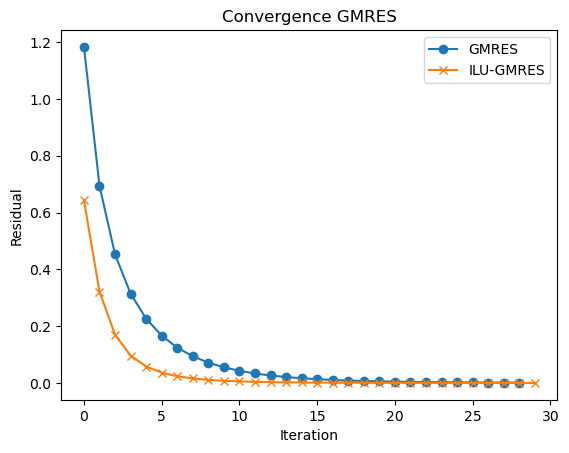

In [52]:
import matplotlib.pyplot as plt

plt.plot(res[1:30], '-o', label='GMRES')
plt.plot(pre_res[:30], '-x', label='ILU-GMRES')
plt.title('Convergence GMRES')
plt.ylabel('Residual')
plt.xlabel('Iteration')
plt.legend()
plt.show()